In [0]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer
import keras
import imageio # To read images
from PIL import Image # For image resizing 
import zipfile

Using TensorFlow backend.


In [0]:
with zipfile.ZipFile('./drive/My Drive/Datasets/agedetectiontrain.zip', 'r') as zip:
  zip.extractall()



In [0]:
with zipfile.ZipFile('./drive/My Drive/Datasets/agedetectiontest.zip', 'r') as zip:
  zip.extractall()

In [0]:
ls -a

./   .bash_history  .cache/   .gsutil/   .jupyter/  .local/     .npm/
../  .bashrc        .config/  .ipython/  .keras/    .node-gyp/  .profile


In [0]:
# Reading the data
train = pd.read_csv('./drive/My Drive/Datasets/train.csv')
test = pd.read_csv('./drive/My Drive/Datasets/test.csv')


Age group: MIDDLE


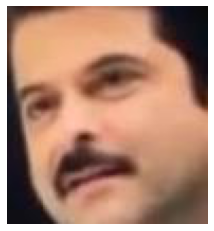

In [0]:
np.random.seed(10)
idx = np.random.choice(train.index)
img_name = train.ID[idx]
img = imageio.imread(os.path.join('./drive/My Drive/Datasets/Train', img_name))
print('Age group:', train.Class[idx])
plt.imshow(img)
plt.axis('off')
plt.show()


In [0]:
temp = []
for img_name in train.ID:
    img_path = os.path.join('./drive/My Drive/Datasets/Train', img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')    
    temp.append(img)
train_x = np.stack(temp)


In [0]:
tem = []
for img_name in test.ID:
    img_path = os.path.join('./drive/My Drive/Datasets/Test', img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')    
    tem.append(img)
test_x = np.stack(tem)


In [0]:
# Normalizing the images
train_x = train_x / 255.
test_x = test_x / 255.


In [0]:
# Encoding the categorical variable to numeric
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = utils.np_utils.to_categorical(train_y)


In [0]:
# Specifying all the parameters we will be using in our network
from clr_callback import * 
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3
# Optimum values
optimizer = keras.optimizers.Adam()
activation = 'relu'
cb_triangular_lr = CyclicLR(base_lr=0.0001, max_lr=0.001, step_size=2000., mode='triangular2') 
weights = keras.initializers.he_normal()
bias = keras.initializers.Constant(value=0.01)
dropout = 0.30
regularizer = keras.regularizers.l2() 
epochs = 21
batch_size = 128


In [0]:
# Defining the network
from keras.layers import Dropout

model = Sequential([
  InputLayer(input_shape=input_num_units),
  Flatten(),
  Dense(units=hidden_num_units, kernel_initializer=weights, 
        bias_initializer=bias, activation=activation, 
       kernel_constraint=keras.constraints.maxnorm(3),
       kernel_regularizer=regularizer),
  Dropout(dropout),
  Dense(units=output_num_units, kernel_initializer=weights, activation='softmax'),
])


In [0]:
# Printing model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               1536500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1503      
Total params: 1,538,003
Trainable params: 1,538,003
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compiling and Training Network
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1, 
         validation_split=0.2)


Train on 15924 samples, validate on 3982 samples
Epoch 1/21
15924/15924 [==============================] - 5s 325us/step - loss: 4.3087 - accuracy: 0.5545 - val_loss: 1.6224 - val_accuracy: 0.5658
Epoch 2/21
15924/15924 [==============================] - 5s 312us/step - loss: 1.1940 - accuracy: 0.5853 - val_loss: 0.9593 - val_accuracy: 0.6062
Epoch 3/21
15924/15924 [==============================] - 5s 313us/step - loss: 0.9577 - accuracy: 0.5926 - val_loss: 0.9105 - val_accuracy: 0.6125
Epoch 4/21
15924/15924 [==============================] - 5s 316us/step - loss: 0.9284 - accuracy: 0.5943 - val_loss: 0.8888 - val_accuracy: 0.6200
Epoch 5/21
15924/15924 [==============================] - 5s 313us/step - loss: 0.9174 - accuracy: 0.5980 - val_loss: 0.8907 - val_accuracy: 0.6145
Epoch 6/21
15924/15924 [==============================] - 5s 316us/step - loss: 0.9123 - accuracy: 0.5966 - val_loss: 0.8765 - val_accuracy: 0.6135
Epoch 7/21
15924/15924 [==============================] - 5s 31

In [0]:
# Saving the model
model.save('optimum_model.h5')
# Loading the model
from keras.models import load_model
mode = load_model('optimum_model.h5')


ValueError: ignored

Original: MIDDLE Predicted: MIDDLE


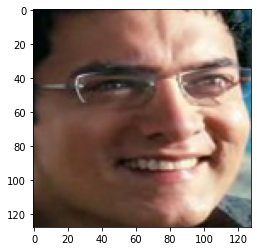

In [0]:
# Visual Inspection of predictions
idx = 2481
img_name = test.ID[idx]
img = imageio.imread(os.path.join('./drive/My Drive/Datasets/Test', img_name))
plt.imshow(np.array(Image.fromarray(img).resize((128, 128))))
pred = model.predict_classes(test_x)
print('Original:', train['Class'][idx], 'Predicted:', lb.inverse_transform(pred)[idx])
